In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
dbpath = "Resources/hawaii.sqlite"

In [6]:
# create engine to hawaii.sqlite
engine = create_engine(f"sqlite:///{dbpath}")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [11]:
# Display the row's columns and data of the Measurement Table in dictionary format
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x262f6b6c8e0>,
 'tobs': 65.0,
 'id': 1,
 'date': '2010-01-01',
 'prcp': 0.08,
 'station': 'USC00519397'}

In [12]:
# Display the row's columns and data of Station in dictionary format
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x262f17c8d00>,
 'latitude': 21.2716,
 'id': 1,
 'elevation': 3.0,
 'station': 'USC00519397',
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168}

In [13]:
# Find the most recent date in the data set.
RecentDate = session.query(func.max(Measurement.date)).all()
RecentDate

[('2017-08-23',)]

In [14]:
# Another way of finding the recent date.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

In [15]:
# Calculate the date one year from the last date in data set.

query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Query Date: ", query_date)

Query Date:  2016-08-23


In [16]:
# Perform a query to retrieve the data and precipitation scores
Dates_1_year_precipitation = session.query(Measurement.date, Measurement.prcp)\
                            .filter(Measurement.date > query_date).all()
Dates_1_year_precipitation

[('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06', 0.0),
 ('2016-10-07'

In [17]:
# Unpack the `dates` and `prcp scores` from results and save into separate lists
Dates = [result[0] for result in Dates_1_year_precipitation]
PCRP = [(result[1]) for result in Dates_1_year_precipitation] # the 2 lists for plots x and y axis 

In [18]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(Dates_1_year_precipitation, columns=['Date', 'prcp'])
df.set_index('Date', inplace=True)
df.head(10)

,prcp
Date,
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01
2016-08-29,0.00
2016-08-30,0.00
2016-08-31,0.13
2016-09-01,0.00


In [19]:
# Sort the dataframe by date and drop null values
Sorted_df = df.sort_values(by = 'Date').dropna()
Sorted_df

,prcp
Date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,2.15
2016-08-24,1.45
...,...
2017-08-22,0.00
2017-08-23,0.08
2017-08-23,0.00


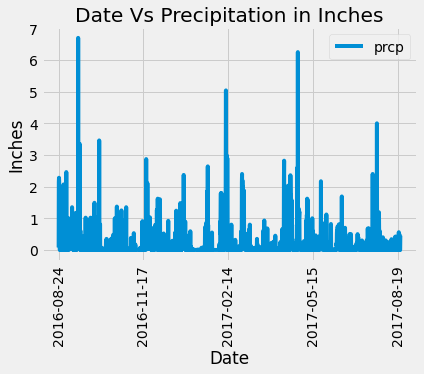

In [20]:
# Use Pandas Plotting with Matplotlib to plot the data

Sorted_df.plot.line(title = "Date Vs Precipitation in Inches")
plt.xticks(rotation= 90)
plt.xlabel("Date")
plt.ylabel("Inches")
plt.show()

In [54]:
# fetching the data and converting it into a DF 
# stmt = session.query(Measurement).\
#     order_by(Measurement.prcp.desc()).statement
# df2 = pd.read_sql_query(stmt, session.bind)
# df2.head(10)

In [21]:
# Use Pandas to calcualte the summary statistics for the precipitation data
Sorted_df["prcp"].describe()

count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

# Exploratory Station Analysis

In [22]:
# Design a query to calculate the total number stations in the dataset
totalStations = session.query(func.count(Station.station)).all()
totalStations

[(9,)]

In [23]:
StationNames = session.query(Station.name, Station.station).all()
StationNames

[('WAIKIKI 717.2, HI US', 'USC00519397'),
 ('KANEOHE 838.1, HI US', 'USC00513117'),
 ('KUALOA RANCH HEADQUARTERS 886.9, HI US', 'USC00514830'),
 ('PEARL CITY, HI US', 'USC00517948'),
 ('UPPER WAHIAWA 874.3, HI US', 'USC00518838'),
 ('WAIMANALO EXPERIMENTAL FARM, HI US', 'USC00519523'),
 ('WAIHEE 837.5, HI US', 'USC00519281'),
 ('HONOLULU OBSERVATORY 702.2, HI US', 'USC00511918'),
 ('MANOA LYON ARBO 785.2, HI US', 'USC00516128')]

In [24]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

Station_Counts = engine.execute("SELECT station,COUNT(station) FROM Measurement GROUP BY station ORDER BY COUNT(station) DESC").fetchall()

Station_Counts

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [25]:
# Using the most active station id from the previous query, calculate the lowest Temperature
lowestTemp = session.query(func.min(Measurement.tobs)).filter_by(station = "USC00519281").all()
lowestTemp

[(54.0,)]

In [26]:
#Calculate the highest temperature.
highestTemp = session.query(func.max(Measurement.tobs)).filter_by(station = "USC00519281").all()
highestTemp

[(85.0,)]

In [27]:
# Calculate the avg temperature.
AvgTemp = session.query(func.avg(Measurement.tobs)).filter_by(station = "USC00519281").all()
AvgTemp 

[(71.66378066378067,)]

In [28]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# Find the most recent date in the data set for the most active station ie. 'WAIHEE 837.5, HI US', 'USC00519281' with 2772 counts.
RecentDate_station = session.query(func.max(Measurement.date)).filter_by(station = "USC00519281").all()
RecentDate_station

[('2017-08-18',)]

In [29]:
# Calculate the date one year from the last date in data set.

query_date = dt.date(2017, 8, 18) - dt.timedelta(days=365)
print("Query Date: ", query_date)

Query Date:  2016-08-18


In [35]:
# Query the last 12 months of temperature observation data for this station
tobs_1_year = session.query(Measurement.date, Measurement.tobs)\
                            .filter(Measurement.date > query_date)\
                            .filter_by(station = "USC00519281").all()
tobs_1_year

[('2016-08-19', 79.0),
 ('2016-08-20', 81.0),
 ('2016-08-21', 79.0),
 ('2016-08-22', 78.0),
 ('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-

In [36]:
# Unpack the `dates` and `prcp scores` from results and save into separate lists
Dates = [result[0] for result in tobs_1_year]
TempObservations = [(result[1]) for result in tobs_1_year] # the 2 lists for plots x and y axis 


In [37]:
# Save the query results as a Pandas DataFrame and set the index to the date column
tobs_DF = pd.DataFrame(tobs_1_year, columns=['Date', 'TOBS'])
tobs_DF.head()

,Date,TOBS
0,2016-08-19,79.0
1,2016-08-20,81.0
2,2016-08-21,79.0
3,2016-08-22,78.0
4,2016-08-23,77.0


Text(0.5, 1.0, 'Waihee Station Temperature Observations')

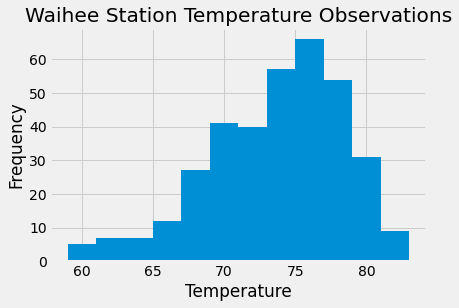

In [38]:
# plot the results as a histogram
plt.hist(tobs_DF['TOBS'], bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Waihee Station Temperature Observations')

# Close session

In [34]:
# Close Session
session.close()